In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-14 10:28:32.576540: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
1609,SPUD,flare1,turn,0.3,"{'knn': 16, 'OD_method': 'default', 'agg_metho...","{'42': 0.891640866873065, '1738': 0.8916408668...","{'42': 0.0013227386440970391, '1738': 0.001322...","{'42': 0.8856589147286822, '1738': 0.872093023...","{'42': 0.8538461538461538, '1738': 0.892307692...","{'42': 0.8769230769230769, '1738': 0.892307692...","{'42': 0.8194199243379572, '1738': 0.841525953...","{'42': 0.8198792101327173, '1738': 0.841525953...","{'42': {'RF-OOB': 0.8662790697674418, 'KNN': 0...","{'knn': 0.0041810136618065765, 'OD_method': 0...."
1325,SPUD,heart_disease,even,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",{'42': 0.4713804713804714},{'42': 0.0070854447958825055},{'42': 0.5168776371308017},{'42': 0.6},{'42': 0.6333333333333333},{'42': 0.5412384108358684},{'42': 0.5601164021164021},"{'42': {'RF-OOB': 0.5210970464135021, 'KNN': 0...","{'knn': 0.03228625634482417, 'OD_method': 0.01..."
2230,RF-SPUD,winequality-red,random,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...","{'42': 0.03314571607254534, '1738': 0.04315196...","{'42': 0.0007556317445119897, '1738': 0.012765...","{'42': 0.05043002345582486, '1738': 0.05668491...","{'42': 0.0265625, '1738': 0.0140625, '5271': 0...","{'42': 0.03125, '1738': 0.040625, '5271': 0.03...","{'42': 0.01762929614659447, '1738': 0.01895589...","{'42': 0.02519562290779396, '1738': 0.01191158...","{'42': {'RF-OOB': 0.05746677091477717, 'KNN': ...",{}
1550,RF-SPUD,tic-tac-toe,even,0.3,"{'knn': 2, 'OD_method': 'absolute_distance', '...",{'42': 0.558455114822547},{'42': 0.00874952602194028},{'42': 0.6246736292428199},{'42': 0.5598958333333334},{'42': 0.6145833333333334},{'42': 0.525559616109406},{'42': 0.5368275186539312},"{'42': {'RF-OOB': 0.6168407310704961, 'KNN': 0...",{}
1092,MASH-,ConcreteCompressiveStrength,turn,0.3,"{'knn': 23, 'page_rank': 'off-diagonal', 'DTM'...","{'42': 0.7706112887755179, '1738': 0.769758573...","{'42': 0.00019276086341785275, '1738': 0.00019...","{'42': 0.8599472744986205, '1738': 0.862462290...","{'42': 0.6846100231546308, '1738': 0.639129856...","{'42': 0.4252263786722268, '1738': 0.445760400...","{'42': 0.7284846145472408, '1738': 0.735914692...","{'42': 0.5396297859440774, '1738': 0.593819115...","{'42': {'RF-OOB': 0.5294847286888441, 'KNN': 0...","{'knn': 0.0877260811251629, 'page_rank': 0.022..."


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


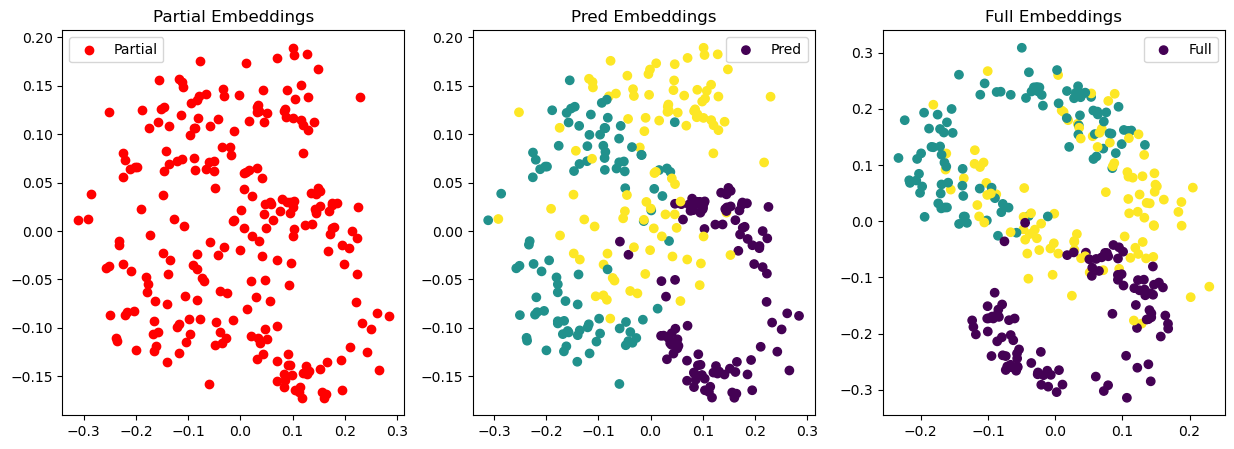

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

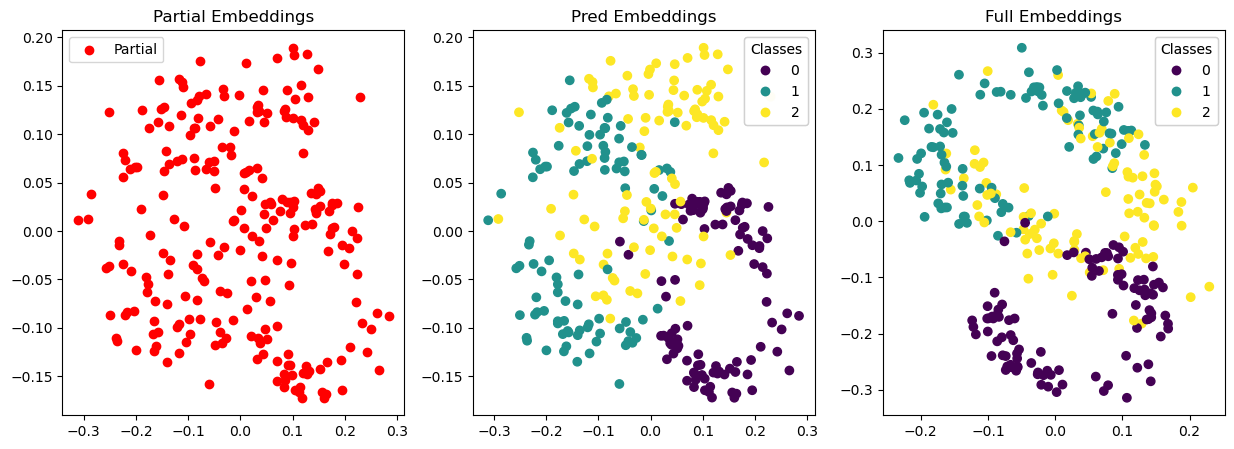

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


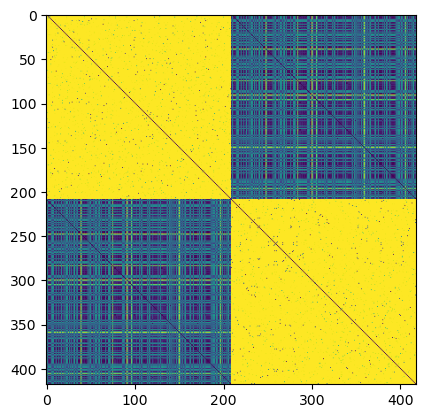

In [8]:
print(tasks[0])
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
plt.imshow(block_full)

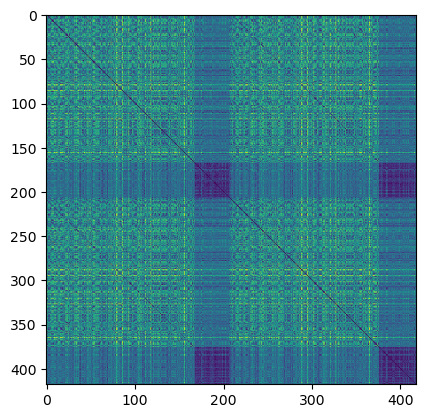

In [9]:
from scipy.spatial.distance import pdist, squareform
plt.imshow(squareform(pdist(emb_pred)))
#plt.imshow(squareform(pdist(emb_full)))

# Marshall's Tests here?

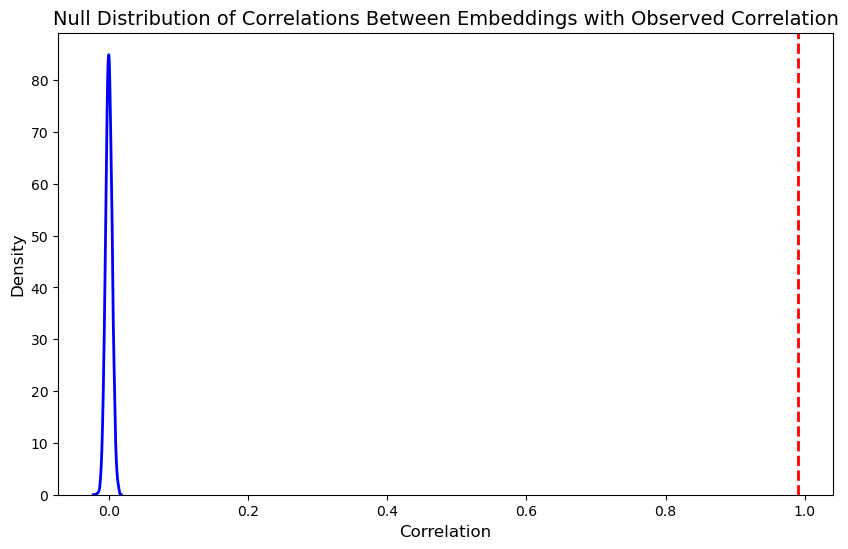

PermissionError: [Errno 13] Permission denied: '/yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/SPUD_iris_turn.json'

In [10]:
r_obs, p_value = mantel_test(*iris_task, plot = True, repeat_results = True)
print(*iris_task)
print(r_obs, p_value)

('MASH-', 'ComputerHardware', 'random', {'knn': 42, 'page_rank': 'None', 'DTM': 'kl', 'density_normalization': False})


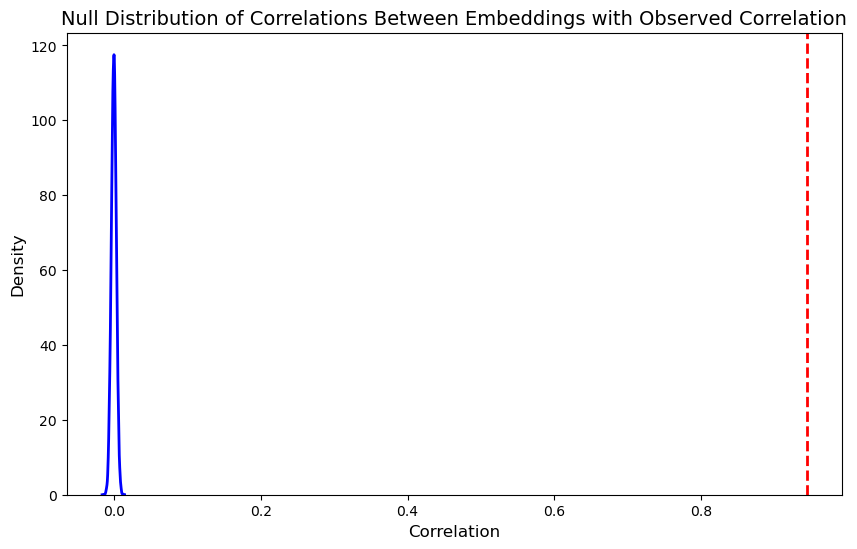

PermissionError: [Errno 13] Permission denied: '/yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/MASH-_ComputerHardware_random.json'

In [22]:
#Unpack all the code and run the mantel test
for i in range(5):
    task_to_run = tasks[i+10]
    print(task_to_run)
    r_obs, p_value = mantel_test(method = task_to_run[0], dataset=task_to_run[1], split = task_to_run[2], params = task_to_run[3], plot = True)
    print(r_obs, p_value)

In [21]:
p_value

nan

In [10]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[:5]
        )


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/5 [00:00<?, ?it/s]2025-01-13 17:09:04.973177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 17:09:04.991319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 17:09:04.996832: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 17:09:05.010618: I tensorflow/core/platf

ValueError: x and y must have length at least 2.

In [11]:
def debug_mantel_test(*args):
    print(f"Arguments passed to mantel_test: {args}")
    return mantel_test(*args)

with tqdm_joblib(tqdm(total=5)): #This includes a progress bar :)
    with Parallel(n_jobs=1) as parallel:
        parallel(
            delayed(debug_mantel_test)(*task)
            for task in tasks[:5]
        )

Arguments passed to mantel_test: ('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-SPUD_ComputerHardware_even.json
Arguments passed to mantel_test: ('RF-MASH-', 'ComputerHardware', 'distort', {'knn': 2, 'page_rank': 'full', 'DTM': 'log', 'density_normalization': False})
Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-MASH-_ComputerHardware_distort.json


Arguments passed to mantel_test: ('SPUD', 'ComputerHardware', 'random', {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'})





896it [03:07,  4.77it/s]


ValueError: x and y must have length at least 2.

# Marshall's Vizualizations Here?